## Threshold model, see Tutorial 11-2.

In [8]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import random
from functions import *

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

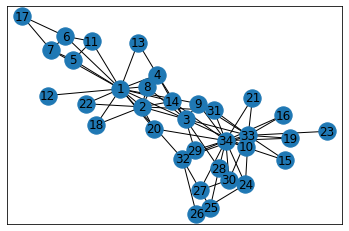

In [3]:
gk=nx.read_adjlist("data/karate_edges_77.txt",nodetype=int)
nx.draw_networkx(gk,pos=nx.spring_layout(gk))

In [4]:
nx.set_node_attributes(gk,0,name="state")#all state 0 at beginning

seeds = get_seeds(gk, 0.2, "friend")#except the seeds
print(seeds)
for seed in seeds:
    gk.nodes[seed]['state']=1

[18, 25, 6, 21, 26, 3]


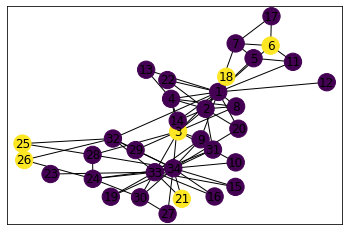

In [5]:
layout = nx.spring_layout(gk)

states = [gk.nodes[i]['state'] for i in gk.nodes()]
nx.draw_networkx(gk,node_color =states, pos=layout)

## the threshold model... finally!

- asynchronous (random) update (taken from tutorial 11-2 code)

(room to discuss what sort of update most befits innovations). Probably asynchronous, as people don't all adopt an innovation at the same time, but rather independently at different times.

Then the question: is it random? probably not. People with targeted neighbours, are more likely to net adopt it themselves, compared to someone who doesn't have any targeted neighbours. even more so, if there's a triangle (adoption probability proportional to triangles). **Room to explore: go sequentially, in order of triangles?**

In [13]:
random.choice(list(gk.nodes()))

26

initial seeds: [6, 1, 33, 14, 34, 11]


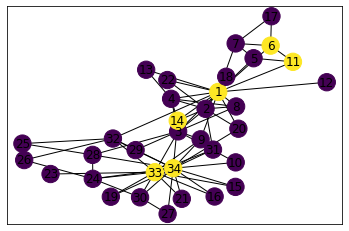

[6, 23, 28, 31, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34]


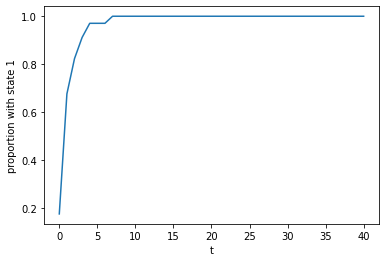

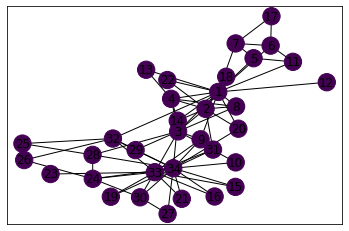

In [21]:
#Initialization of the variables
q=0.3
tmax=40 #each t involves N updates
N = gk.number_of_nodes()
rho=[]

# Initial Condition
nx.set_node_attributes(gk,0,name="state")#all state 0 at beginning
seeds = get_seeds(gk, 0.2, "friend")#except the seeds
print("initial seeds:", seeds)
for seed in seeds:
    gk.nodes[seed]['state']=1
    
rho.append(np.sum([gk.nodes[i]['state'] for i in gk.nodes()]))

#Plot initial condition
states0 = [gk.nodes[i]['state'] for i in gk.nodes()]
nx.draw_networkx(gk,node_color =states0, pos=layout)
plt.show()

# Dynamics
for t in range(tmax):
    for t2 in range(N): # Do N updates, one update for each node, on average
        n = random.choice(list(gk.nodes()))
        if gk.nodes[n]['state']==0:#only change if the state is 0. Once state 1, no going back
            count=0
            for m in gk.neighbors(n):
                count = count+gk.nodes[m]['state']
            if count/gk.degree(n)> q: #if the proportion of 'infected' > q
                gk.nodes[n]['state']=1

    newstates = [gk.nodes[i]['state'] for i in gk.nodes()]
    rho.append(np.sum(newstates))

#plotting output    
print(rho)

plt.plot(range(len(rho)),np.array(rho)/N)
plt.xlabel("t")
plt.ylabel('proportion with state 1')#r"$\rho$"
plt.show()


statesp = [gk.nodes[i]['state'] for i in gk.nodes()]
nx.draw_networkx(gk,node_color = statesp, pos=layout)
plt.show()

In [23]:
len(rho)

41

In [49]:
#RUN the above `rep` times, and return a matrix with the corresponding proportions of state 1 (rho/N)
def get_rhos(gk, q, tmax, rep, seed_method, p = 0.2):
    
    N = gk.number_of_nodes()
    all_rhos = np.zeros(shape=(rep, tmax + 1)) # matrix row: one sample, matrix col: time

    for i in range(rep):
        rho=[]

        # Initial Condition
        nx.set_node_attributes(gk,0,name="state")#all state 0 at beginning
        seeds = get_seeds(gk, p, seed_method)#except the seeds
        #print("initial seeds:", seeds)
        for seed in seeds:
            gk.nodes[seed]['state'] = 1

        rho.append(np.sum([gk.nodes[i]['state'] for i in gk.nodes()]))


        # Dynamics
        for t in range(tmax):
            for t2 in range(N): # Do N updates, one update for each node, on average
                n = random.choice(list(gk.nodes()))
                if gk.nodes[n]['state']==0:#only change if the state is 0. Once state 1, no going back
                    count=0
                    for m in gk.neighbors(n):
                        count = count + gk.nodes[m]['state']
                    if count/gk.degree(n)> q: #if the proportion of 'infected' > q
                        gk.nodes[n]['state']=1

            newstates = [gk.nodes[i]['state'] for i in gk.nodes()]
            rho.append(np.sum(newstates))
        
        rho = np.array(rho)/N #get proportion
        #print(rho)
        all_rhos[i] = rho
    
    return all_rhos


In [66]:
Frhos = get_rhos(gk, q = 0.4, tmax = 20, rep = 200, seed_method = 'friend')

In [67]:
friend_props = Frhos.mean(axis=0) #take the mean over each col (time)
friend_stds = Frhos.std(axis = 0) #for errorbars
print(friend_props)
friend_stds

[0.17647059 0.48117647 0.64117647 0.73411765 0.80058824 0.83588235
 0.85882353 0.86970588 0.87411765 0.875      0.87617647 0.87647059
 0.87647059 0.87647059 0.87647059 0.87647059 0.87647059 0.87647059
 0.87647059 0.87647059 0.87647059]


array([3.05311332e-16, 1.23145060e-01, 1.71397674e-01, 1.83342665e-01,
       1.79319166e-01, 1.81600916e-01, 1.80157563e-01, 1.79737169e-01,
       1.79584295e-01, 1.79550332e-01, 1.79450092e-01, 1.79628606e-01,
       1.79628606e-01, 1.79628606e-01, 1.79628606e-01, 1.79628606e-01,
       1.79628606e-01, 1.79628606e-01, 1.79628606e-01, 1.79628606e-01,
       1.79628606e-01])

In [72]:
#pair
Prhos = get_rhos(gk, q = 0.4, tmax = 20, rep = 200, seed_method = 'pair')
pair_props = Prhos.mean(axis=0) 
pair_stds = Prhos.std(axis = 0) 

In [74]:
#random
Rrhos = get_rhos(gk, q = 0.4, tmax = 20, rep = 200, seed_method = 'random')
rand_props = Rrhos.mean(axis=0) 
rand_stds = Rrhos.std(axis = 0) 

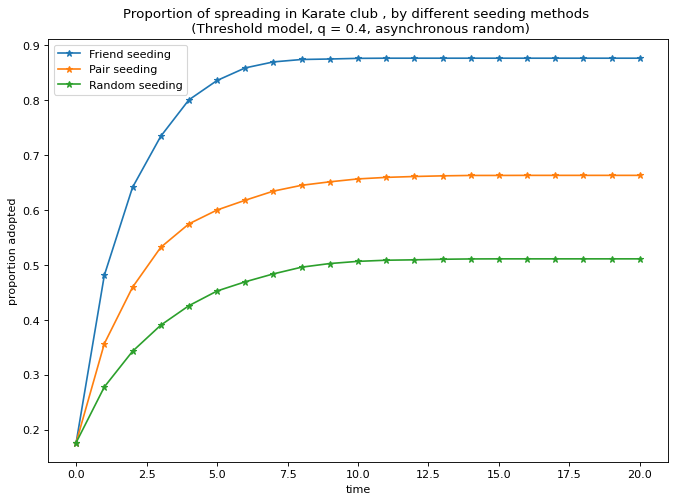

In [80]:
plt.figure(figsize=(10, 7), dpi=80)
plt.plot(np.arange(0, len(friend_props)), friend_props,"-*",label=r"Friend seeding")
#plt.errorbar(np.arange(0, len(friend_props)), friend_props, yerr = friend_stds, fmt = "-*", label=r"Friend seeding")

plt.plot(np.arange(0, len(pair_props)), pair_props,"-*",label=r"Pair seeding")
plt.plot(np.arange(0, len(rand_props)), rand_props,"-*",label=r"Random seeding")

plt.xlabel("time")
plt.ylabel("proportion adopted")
plt.title("Proportion of spreading in Karate club , by different seeding methods \n (Threshold model, q = 0.4, asynchronous random)")
plt.legend()
plt.show()